## *1 - Existem valores faltantes ou outliers no dataset? Se sim, como você abordaria o tratamento dessas inconsistências? Explique as técnicas que utilizaria para lidar com essas questões.*

In [559]:
import pandas as pd

url = 'https://github.com/Carlos-Vic/diabetes-ps/raw/main/diabetes.csv'
dataset = pd.read_csv(url)

In [560]:
# Mostrando informaçoes para verificar se existem valores faltantes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   764 non-null    float64
 2   BloodPressure             748 non-null    float64
 3   SkinThickness             758 non-null    float64
 4   Insulin                   765 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Verificando as informaçoes acima é possivel notar que existem alguns valores faltantes, como por exemplo a coluna Glucose que tem 764 entradas de 768. A seguir ficará mais claro quais sao as colunas que possuem valores faltantes e suas quantidades

In [561]:
# Essa funçao ira somar os valores nulos de cada coluna e mostrar na saida
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,4
BloodPressure,20
SkinThickness,10
Insulin,3
BMI,11
DiabetesPedigreeFunction,1
Age,0
Outcome,0


Aqui é possivel ver acima as colunas que possuem valores nulos e ver quantos são

In [562]:
# para analisar os dados e ver se acha alguma coluna com possivel outliers
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,764.000000,748.000000,758.000000,765.000000,757.000000,767.000000,768.000000,768.000000
mean,3.845052,120.821990,68.950535,20.679420,79.594771,32.001585,428.227575,33.240885,0.348958
std,3.369578,32.004746,19.307876,15.960118,115.340132,7.787967,340.707768,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,205.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,25.000000,32.000000,337.000000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.500000,592.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


Ao analisar os dados, é possível observar que algumas colunas apresentam valores que não condizem com a realidade. Por exemplo, na coluna BMI, o valor mínimo é 0, o que não é possível na prática, já que uma pessoa não pode ter índice de massa corporal igual a zero. Isso indica a presença de dados inválidos ou possíveis outliers que precisam ser tratados. Uma possivél solução é substituir esses valores nulos e valores com entrada 0 pela mediana.

*Obs: apesar de pacientes com diabetes possuem Insulina muito baixas ou até mesmo zeradas, irei mesmo assim substituir esses valores*

In [563]:
import numpy as np

colunas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'] # colunas com valores faltantes e valores com entrada 0

# Substituindo 0 por NaN nessas colunas
for col in colunas:
    dataset[col] = dataset[col].replace(0, np.nan)

# Substituindo os valores nulos pela mediana
for col in colunas:
    mediana = dataset[col].median()
    dataset[col] = dataset[col].fillna(mediana)

In [564]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Com isso é possível ver que os valores inexistentes e os valores com entrada 0 foram todos substituídos pela mediana

Para verificar outliers no dataset, é possivél adotar a estratégia de usar a Amplitude interquartil (Diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1)).

Para isso seguirei os passos:
*   Calcular primeiro e terceiro quartil
*   Determinar a Amplitude interquartil
*   Encontrar o limite inferior Q1 * 1,5
*   Encontrar o limite superior Q3 * 1,5

https://www.youtube.com/watch?v=A3gClkblXK8

In [565]:
print("Análise de outliers com base no IQR:\n")

colunas = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

for col in colunas:
    Q1 = dataset[col].quantile(0.25) # Primeiro quartil
    Q3 = dataset[col].quantile(0.75) # Terceito quartil
    IQR = Q3 - Q1                    # Amplitude interquatil
    limite_inferior = Q1 - 1.5 * IQR # definindo o limite inferior
    limite_superior = Q3 + 1.5 * IQR # definindo o limite superior

    outliers = dataset[(dataset[col] < limite_inferior) | (dataset[col] > limite_superior)] # pegando os outliers de cada coluna

    print(f'Coluna: {col}')
    print(f'   -> Limite inferior: {round(limite_inferior, 2)}')
    print(f'   -> Limite superior: {round(limite_superior, 2)}')
    print(f'   -> Outliers encontrados: {len(outliers)}\n')

Análise de outliers com base no IQR:

Coluna: Pregnancies
   -> Limite inferior: -6.5
   -> Limite superior: 13.5
   -> Outliers encontrados: 4

Coluna: Glucose
   -> Limite inferior: 39.38
   -> Limite superior: 200.38
   -> Outliers encontrados: 0

Coluna: BloodPressure
   -> Limite inferior: 40.0
   -> Limite superior: 104.0
   -> Outliers encontrados: 14

Coluna: SkinThickness
   -> Limite inferior: 14.5
   -> Limite superior: 42.5
   -> Outliers encontrados: 86

Coluna: Insulin
   -> Limite inferior: 121.25
   -> Limite superior: 129.25
   -> Outliers encontrados: 379

Coluna: BMI
   -> Limite inferior: 14.36
   -> Limite superior: 49.66
   -> Outliers encontrados: 10

Coluna: DiabetesPedigreeFunction
   -> Limite inferior: -374.75
   -> Limite superior: 1171.25
   -> Outliers encontrados: 29



Observando os resultados obtidos, nota-se a presença de uma quantidade significativa de outliers nos dados. Existem algumas opções para tratar esse problema, como a remoção dos outliers do dataset ou a aplicação de capping (limitação dos valores extremos).

In [566]:
# fazendo uma cópia para tratar mais a frente
dataset_com_capping = dataset.copy()

for col in colunas:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Aplicando o capping pelo IQR
    dataset_com_capping[col] = dataset_com_capping[col].apply(
        lambda x: limite_inferior if x < limite_inferior else
                  limite_superior if x > limite_superior else x
    )

In [567]:
dataset_com_capping.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.563802,72.188802,28.925781,125.125977,32.357975,416.761458,33.240885,0.348958
std,3.344157,30.387821,11.522984,7.389981,2.825545,6.572906,302.333338,11.760232,0.476951
min,0.000000,44.000000,40.000000,14.500000,121.250000,18.200000,0.100000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,124.250000,27.600000,205.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,337.000000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.250000,36.425000,591.500000,41.000000,1.000000
max,13.500000,199.000000,104.000000,42.500000,129.250000,49.662500,1171.250000,81.000000,1.000000


Ao observar os resultados, é possível notar que os outliers foram tratados. No entanto, a variável Insulin apresentou uma variação muito baixa após o capping, o que indica que seus valores foram muito achatados, abaixo é possível notar isso pelo gráfico. Mais adiante, será apresentado um diagnóstico mais detalhado da distribuição das variáveis e uma abordagem alternativa para tratar os outliers de Insulin.

In [568]:
import plotly.express as px

fig = px.histogram(dataset_com_capping, x='Insulin', marginal='box', nbins=40, title='Distribution of Insulin After Capping')
fig.update_layout(bargap=0.1)
fig.show()

In [569]:
fig = px.histogram(dataset, x='Insulin', marginal='box', nbins=40, title='Distribution of Insulin Before Capping')
fig.update_layout(bargap=0.1)
fig.show()

## *2 - Como as principais variáveis (Glucose, BloodPressure, BMI, etc.) estão distribuídas? Utilize histogramas e boxplots para representar visualmente essas distribuições e analise as características de cada uma.*

In [570]:
# Plotando um histograma e boxplot para as variáveis do dataset
for col in colunas:
    fig = px.histogram(dataset, x=col, marginal='box', nbins=40, title=f'Distribution of {col}')
    fig.update_layout(bargap=0.1)
    fig.show()

Observando os gráficos gerados é possível notar que:

 * Glucose

A variável apresenta uma distribuição aproximadamente simétrica, com maior concentração de valores entre 105 e 109.

 * BloodPressure

Distribuição levemente assimétrica a esquerda, com concentração entre 72 e 74.

 * Insulin

A distribuição é altamente assimétrica a direita, com forte concentração de valores abaixo de 200.

 * BMI

A distribuição do BMI é levemente assimétrica à direita, com concentração por volta de 32. Alguns outliers são observados acima de 50, indicando casos de obesidade severa.

 * DiabetesPedigreeFunction

Essa variável apresenta uma distribuição fortemente assimétrica a direita, com a maioria dos valores abaixo de 500. Existem diversos outliers acima de 1000, o que pode representar pacientes com histórico hereditário forte de diabetes.


De forma geral, as variáveis apresentam distribuições com assimetria positiva e presença de outliers

## *3 - Existe uma correlação entre a idade dos indivíduos e a presença de diabetes? Realize uma análise estatística (como teste de correlação) e utilize gráficos (como scatter plot ou boxplot) para ilustrar essa relação.*

In [571]:
# Usando .corr para calcular a correlaçao entre idade e diabetes
dataset.Outcome.corr(dataset.Age)

np.float64(0.23835598302719752)

Observando o valor da correlação entre a variável idade e o diagnóstico de diabetes, é possivel notar que existe uma relação positiva, porém um pouco fraca. Isso mostra, em geral, que quanto maior a idade, maior a probabilidade de diagnóstico positivo para diabetes. No entanto, essa correlação não é forte o suficiente para afirmar que a idade, isoladamente, determina o resultado.

As outras variáveis como glicose, IMC, entre outras, também podem exercer influência significativa no diagnóstico da doença. Assim, a idade deve ser considerada em conjunto com outras variáveis para uma análise mais precisa e confiável.



In [572]:
# boxplot para mostrar o correlaçao das variavéis
fig = px.box(dataset,
             x='Outcome',
             y='Age',
             title='Age vs Diabetes')
fig.show()

Observando o gráfico, é possível notar que no grupo de mulheres sem diagnóstico de diabetes, a maioria está na faixa entre 21 e 37 anos. Entre as que possuem diabetes, a faixa está entre 28 e 44 anos.

Esses dados sugerem uma correlação positiva entre idade e diagnóstico de diabetes — ou seja, quanto maior a idade, maior a probabilidade de desenvolver a doença. Apesar de a correlação estatística ser considerada fraca cerca de 0.24, o gráfico mostra a tendência de que a idade tem influência relevante nesse contexto.

## *4 - Quais variáveis apresentam maior correlação com a presença de diabetes? Quais variáveis parecem ser as mais indicativas da presença de diabetes?*

Text(0.5, 1.0, 'Correlation Matrix')

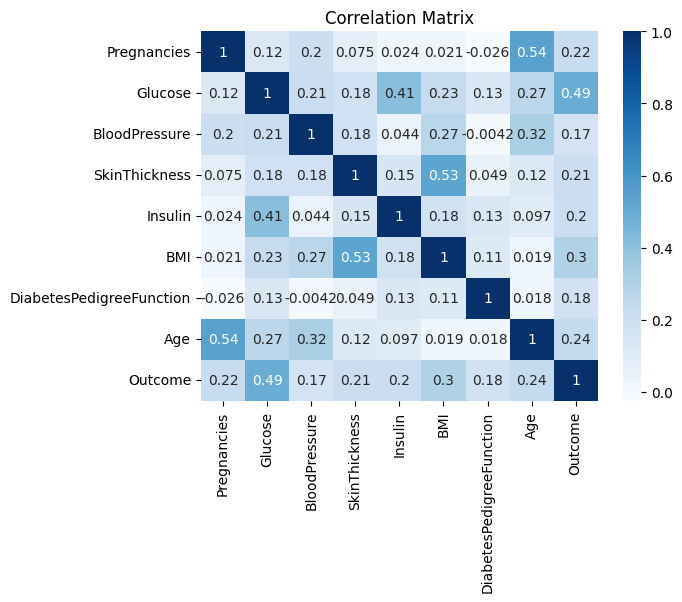

In [573]:
# imports para os graficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# usando o heatmap para fazer uma matriz de correlaçao das variaveis
sns.heatmap(dataset.corr(), cmap='Blues', annot= True)
plt.title('Correlation Matrix')

Observando o heatmap, podemos notar pela última linha e analisar as variáveis que possuem a maior correlação, são elas em ordem:


*   Glucose (0,49)
*   BMI (0,3)
*   Age (0,24)
*   Preagnancies (0,22)
*   SkinThinckness (0,21)
*   Insulin (0,2)
*   DiabetesPedrigreeFunction (0,18)
*   BloodPreassure (0,17)

## *5 - Existe uma relação entre o IMC dos pacientes e o diagnóstico de diabetes? Compare os valores médios de IMC entre os grupos com e sem diabetes, e analise a diferença estatisticamente.*

Para análise estatistica, irei usar o t-student e com o paramentro de que se se p < 0.05, então a diferença de médias é estatisticamente significativa

In [574]:
# Import para fazer t-student
from scipy.stats import ttest_ind

# Separando os grupos distintos
bmi_com_diabetes = dataset[dataset['Outcome'] == 1]['BMI']
bmi_sem_diabetes = dataset[dataset['Outcome'] == 0]['BMI']

# t-student
t_stat, p_valor = ttest_ind(bmi_com_diabetes, bmi_sem_diabetes)

print("Estatística t:", t_stat)
print("p valor:", p_valor)

Estatística t: 8.73778365313686
p valor: 1.484957642007889e-17


Através do teste, é possível identificar uma diferença estatisticamente significativa entre os valores médios de IMC dos pacientes com e sem diabetes, pois o p < 0.05. Isso sugere que pacientes com diabetes tendem a apresentar valores de IMC mais elevados, o que indica que o excesso de peso pode ser um fator de risco importante no desenvolvimento de diabetes. Isso pode ser observado no gráfico abaixo, onde o grupo com diabetes tem uma mediana de IMC mais alta do que o grupo sem diabetes. Isso mostra que, em média, pacientes com diabetes possuem índices de massa corporal mais altos.

In [575]:
fig = px.box(dataset,
             x='Outcome',
             y='BMI',
             title='BMI vs Diabetes')
fig.show()

## *6 - Existe um valor específico de glicose que pode ser considerado crítico para o diagnóstico de diabetes? Utilize gráficos de dispersão e cálculos estatísticos para investigar esse ponto e definir um limite crítico, se possível*

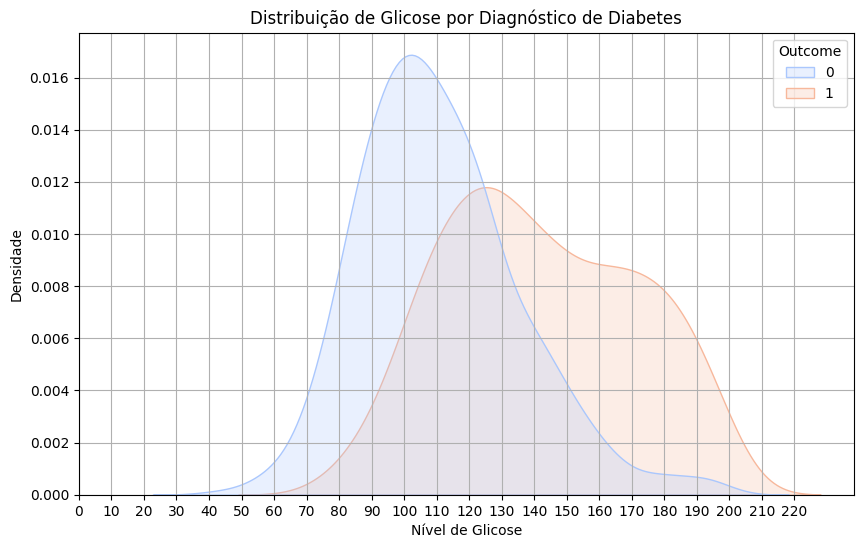

In [576]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=dataset, x='Glucose', hue='Outcome', fill=True, common_norm=False, palette='coolwarm')

plt.title('Distribuição de Glicose por Diagnóstico de Diabetes')
plt.xlabel('Nível de Glicose')
plt.ylabel('Densidade')

xticks = np.arange(0, 221, 10)
plt.xticks(xticks)


plt.grid(True)
plt.show()

Observando o gráfico é possivel notar que pessoas sem diabetes tendem a ter níveis de glicose mais baixos, com pico por volta de 100. Já as pessoas com diabetes têm níveis mais altos, com a curva deslocada para a direita, em torno de 120–160. Também existe uma separação visível entre as curvas, o que indica que o nível de glicose é um bom indicativo para diagnóstico de diabetes. Além disso o ponto onde as duas curvas se cruzam é uma boa estimativa de um limite crítico de glicose (por volta de 125), esse indicativo condiz com a realidade de diagnósticos médicos reais de acordo com: https://www.tjdft.jus.br/informacoes/programas-projetos-e-acoes/pro-vida/dicas-de-saude/pilulas-de-saude/voce-sabe-o-que-e-a-pre-diabetes-entenda-tudo-sobre-o-assunto.

## *7 - Treine um modelo de árvore de decisão para prever a presença de diabetes com base nas variáveis do dataset. Qual foi a acurácia obtida? Discuta os resultados e possíveis melhorias para o modelo.*

In [577]:
# Imports para o modelo de arvore de decisao
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']              # Target

# Separando os dados entre teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [578]:
# Criando e treinando o modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# fazendo as prediçoes
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [579]:
from sklearn.metrics import accuracy_score

# Calculando a acurácia
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Acurácia do set de Teste:", accuracy_test)

accuracy = accuracy_score(y_train, y_pred_train)
print("Acurácia do set de Treino:", accuracy)

Acurácia do set de Teste: 0.6493506493506493
Acurácia do set de Treino: 1.0


Calculando a acurácia do modelo, vemos acima que temos um caso de overfitting dado que a acurácia de teste foi bem menor que a de treino

In [580]:
from sklearn.metrics import confusion_matrix

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[104  47]
 [ 34  46]]


Obersavndo a matriz de confusão, nota-se que ele acerta bastante quando o paciente não tem diabetes com 104 acertos. Mas erra consideravelmente quando o paciente tem diabetes onde 34 casos de diabetes que ele não detectou e 46 casos que ele disse ter diabetes, mas não tinham.

In [581]:
from sklearn.metrics import classification_report

# Calculando o relatório de classificação
report = classification_report(y_test, y_pred_test)
print("Relatório de Classificação:")
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       151
           1       0.49      0.57      0.53        80

    accuracy                           0.65       231
   macro avg       0.62      0.63      0.63       231
weighted avg       0.66      0.65      0.65       231



Obervando o relatório acima é possivel notar que com a classe 0 (sem diabetes) a precisão é 0.75, ou seja, 1uando o modelo previu "sem diabetes", ele acertou 75% das vezes. O recall é 0.69, ele identificou 69% de todos os casos reais de pacientes sem diabetes. Para a classe 1 (com diabetes), a precisão foi de 0.49, apenas 49% das previsões de “com diabetes” estavam corretas. Ou seja, muitos falsos positivos. O recall foi de 0.54, o modelo identificou 54% dos pacientes que realmente tinham diabetes.

Uma forma de aprimorar o modelo seria aplicar uma técnica de balanceamento, já as classes são desproporcionais, com mais pacientes classificados como Outcome = 0 do que Outcome = 1, é possível notar isso pelos dados abaixo. Além disso, usar RandomizedSearchCV para a buscar os melhores parâmetros para o modelo pode ser uma estratégia válida para melhorar os resultados.

In [582]:
y.value_counts()

,count
Outcome,
0,500
1,268


## *8 - A variável DiabetesPedigreeFunction está relacionada à presença de diabetes? Pacientes com histórico familiar de diabetes apresentam maior risco? Realize uma análise exploratória e estatística para verificar essa relação.*

In [583]:
fig = px.box(dataset,
             x='Outcome',
             y='DiabetesPedigreeFunction',
             title='DiabetesPedigreeFunction vs Diabetes')
fig.show()

Analisando o gráfico acima, é possível observar que a mediana da variável para pacientes com diabetes é um pouco maior do que a mediana dos pacientes sem diabetes. Isso mostra que indivíduos com maior histórico familiar da doença tendem a apresentar maior risco de desenvolver diabetes. No entanto, também é evidente que há uma grande sobreposição entre os dois grupos, com muitos valores semelhantes para pacientes com e sem diabetes. Isso mostra que, embora exista uma tendência, a variável não é perfeita para diagnosticar a presença da doença com alta precisão de maneira isolada.

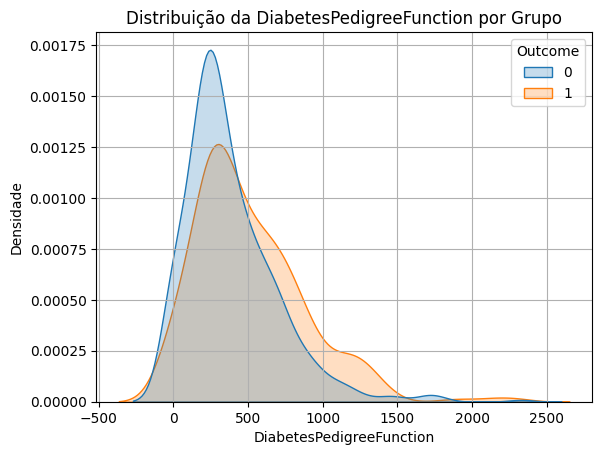

In [584]:
sns.kdeplot(data=dataset, x='DiabetesPedigreeFunction', hue='Outcome', fill=True, common_norm=False)

plt.title('Distribuição da DiabetesPedigreeFunction por Grupo')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

Observando o gráfico acima, nota-se que os pacientes sem diabetes apresentam um pico de densidade em valores mais baixos da variável DiabetesPedigreeFunction. Já os pacientes com diabetes também concentram-se nesses valores baixos, mas exibem uma cauda mais longa para a direita, indicando uma maior proporção de indivíduos com valores mais altos, ou seja, com maior histórico familiar de diabetes.

Apesar dessa tendência, existe uma grande sobreposição entre as curvas dos dois grupos. Isso indica que, apesar da variável DiabetesPedigreeFunction tenha realação com a doença, ela sozinha não é suficiente para prever com alta precisão a presença de diabetes assim como foi visto no outro gráfico de cima.

In [585]:
grupo_com = dataset[dataset['Outcome'] == 1]['DiabetesPedigreeFunction']
grupo_sem = dataset[dataset['Outcome'] == 0]['DiabetesPedigreeFunction']

t_stat, p_valor = ttest_ind(grupo_com, grupo_sem)

print("Estatística t:", t_stat)
print("p valor:", p_valor)

Estatística t: 4.973636744486365
p valor: 8.115718716754595e-07


Como o p valor é menor que 0.05 existem evidências estatisticamente significativas para concluir que existe uma diferença nas médias da variável DiabetesPedigreeFunction entre o grupo de pacientes com diabetes e o grupo de pacientes sem diabetes.

## *9 - Pacientes com mais de 50 anos têm taxas de diabetes mais altas do que pacientes mais jovens? Utilize estatísticas descritivas e gráficos comparativos para demonstrar as diferenças entre esses dois grupos etários.*


In [586]:
# Criando uma nova coluna com o grupo etário
dataset['GrupoEtario'] = dataset['Age'].apply(lambda x: '>50' if x > 50 else '<=50')

# Calculando a porcetagem de pacientes com diabete de acordo com a faixa etária de 50 anos
taxas_diabetes = dataset.groupby('GrupoEtario')['Outcome'].mean() * 100
taxas_diabetes

,Outcome
GrupoEtario,
<=50,33.478894
>50,46.913580


Aqui é possível notar as taxas de diabetes aumentam com a idade >50

In [587]:
dataset.groupby('Outcome')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,31.190000,11.667655,21.0,23.0,27.0,37.0,81.0
1,268.0,37.067164,10.968254,21.0,28.0,36.0,44.0,70.0


Analisando esses resultados pacientes sem diabetes possuem uma idade média de 31,19 anos, com mediana de 27 anos. Já os pacientes com diabetes tem uma idade média de 37,07 anos, com mediana de 36 anos. Além disso, os quartis (25%, 50% e 75%) do grupo com diabetes são mais elevados, indicando que esses pacientes, de forma geral, são mais velhos do que os sem a condição. Isso mostra que pacientes mais velhos a diabete prevalece

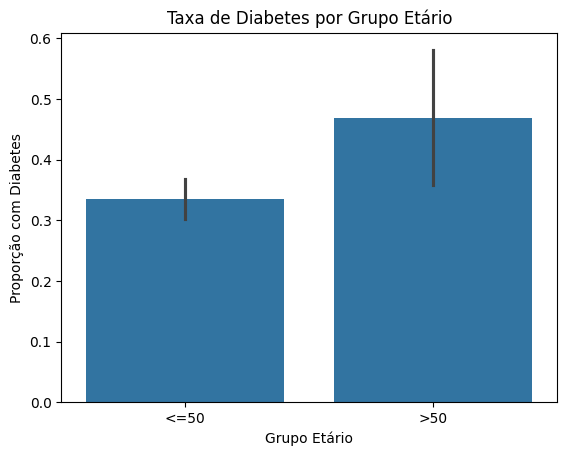

In [588]:
sns.barplot(data=dataset, x='GrupoEtario', y='Outcome')
plt.title('Taxa de Diabetes por Grupo Etário')
plt.ylabel('Proporção com Diabetes')
plt.xlabel('Grupo Etário')
plt.show()

Vendo o gráfico, o grupo com >50 tem uma proporção maior que o grupo com <=50. Isso mostra que paciente com mais de 50 anos tem uma taxa de diabetes visivelmente maior, o que está em concordância com os dados estatísticos apresentados anteriormente

In [589]:
dataset.drop('GrupoEtario', axis=1, inplace=True)

## *10 -Utilize regressão logística para estimar a probabilidade de um paciente ser diagnosticado com diabetes. Quais variáveis são mais influentes no modelo e como elas impactam a probabilidade de diagnóstico?*

In [590]:
# import do modelo
from sklearn.linear_model import LogisticRegression

X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# separaçao de teste/treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# treinando o modelo
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)

# fazendo as prediçoes
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [591]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Acurácia do set de Teste:", accuracy_test)

accuracy = accuracy_score(y_train, y_pred_train)
print("Acurácia do set de Treino:", accuracy)
print()
cm = confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusão:")
print(cm)
print()
report = classification_report(y_test, y_pred_test)
print("Relatório de Classificação:")
print(report)

Acurácia do set de Teste: 0.7229437229437229
Acurácia do set de Treino: 0.776536312849162

Matriz de Confusão:
[[123  28]
 [ 36  44]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.61      0.55      0.58        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231



Treinando o modelo de Regressão Logística, foi possível ter uma acurácia de 72%. A precisão do modelo foi de 0.77 para pacientes sem diabetes e 0.61 para pacientes com diabetes, ou seja, ele tem um desempenho melhor em prever pacientes que não possuem a doença, sendo possivel verificar isso na matriz de confusão, onde ele acerta 123 pacientes sem diabetes e 44 pacientes com diabetes, isso se da provavelmente pelo fato de que existem mais pacientes com diagnóstico negativo do que positivo, como foi visto mais acima. A seguir será possível ver quais são as variáveis com mais impacto nesse modelo.

In [592]:
# pegando os nomes das variaveis
features = X.columns

# pegando o coeficientes do modelo
coeficientes = model.coef_[0]

# criando um novo DataFrame para visualizar os coeficientes ao lado do nome de cada variável
importances = pd.DataFrame({
    'Variável': features,         # nome da feature
    'Coeficiente': coeficientes   # valor do coeficiente
})

# ordenando do maior coeficiente para o menor
importances = importances.sort_values(by='Coeficiente', ascending=False)

importances

,Variável,Coeficiente
5,BMI,0.098761
0,Pregnancies,0.057375
1,Glucose,0.039512
7,Age,0.032530
3,SkinThickness,0.009826
6,DiabetesPedigreeFunction,0.000338
4,Insulin,-0.000437
2,BloodPressure,-0.005718


Aqui é possivel observar que as variáveis que mais impactam no modelo são por ordem BMI, Preagnancies, Glucose, Age, SkinThickness, DiabetesPedigreeFunction, Insluin e BloodPressure. Onde a de maior impacto é a BMI, pois é a mais próxima de 1, as variáveis Preagnacies, Glucose e Age tem um impacto positivo também. SkinThickness, DiabetesPedigreeFunction, Insluin e BloodPressure tem pouco impacto já que são muito próximas de 0 ou negativas

## *11 - Quais técnicas de feature engineering podem ser aplicadas para melhorar a previsão do diagnóstico de diabetes utilizando modelos de aprendizado de máquina? Experimente transformar variáveis existentes, criar novas variáveis a partir de combinações ou interações e utilize técnicas como encoding, normalização ou transformação de características. Avalie o impacto dessas mudanças no desempenho de um modelo de aprendizado de máquina (por exemplo, Random Forest ou XGBoost).*

In [593]:
dataset_com_capping.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.563802,72.188802,28.925781,125.125977,32.357975,416.761458,33.240885,0.348958
std,3.344157,30.387821,11.522984,7.389981,2.825545,6.572906,302.333338,11.760232,0.476951
min,0.000000,44.000000,40.000000,14.500000,121.250000,18.200000,0.100000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,124.250000,27.600000,205.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,337.000000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.250000,36.425000,591.500000,41.000000,1.000000
max,13.500000,199.000000,104.000000,42.500000,129.250000,49.662500,1171.250000,81.000000,1.000000


Como mencionado anteriormente, o tratamento de outliers em 'Insulin' utilizando o método do IQR não se mostrou eficaz, já que os valores ficaram muito dispersos, o que pode ser observado pelo gráfico abaixo.

In [594]:
# plotando o grafico de Insulin com o método IQR
fig = px.histogram(dataset_com_capping, x='Insulin', marginal='box', nbins=40, title=f'Distribution of Insulin')
fig.update_layout(bargap=0.1)
fig.show()

Dessa forma, uma alternativa para lidar com esse problema é aplicar a transformação logarítmica na variável, resultando em uma distribuição mais adequada. Essa melhoria pode ser observada no gráfico abaixo, que mostra a distribuição dessa variável.

In [595]:
# aplicando o log na coluna Insulin do dataset e colocando junto as outras variáveis
dataset_com_capping['Insulin_log'] = np.log(dataset['Insulin'])

In [596]:
# plotando o gráfico para comparaçao após aplicar o log
fig = px.histogram(dataset_com_capping, x='Insulin_log', marginal='box', nbins=40, title='Distribution of Insulin After Log')
fig.update_layout(bargap=0.1)
fig.show()

In [597]:
# removendo a coluna Insulin do dataset
dataset_com_capping.drop('Insulin', axis=1, inplace=True)

# fazendo uma cópia para fazer mais tratamentos no futuro
dataset_final = dataset_com_capping.copy()

In [598]:
# import para o modelo
from sklearn.ensemble import RandomForestClassifier

# separando os dados
y = dataset_final.Outcome # target
X = dataset_final.drop('Outcome', axis=1)

Outra forma de melhorar os resultados do modelo é balanceando o target, já que como foi mencionado mais acima, existe uma quantidade maior de pacientes com Outcome = 0 comparado aos pacientes com Outcome = 1. Essa diferença pode prejudicar a capacidade do modelo de aprender padrões relacionados ao diagnóstico positivo.

In [599]:
# import para fazer o balanceamento
from imblearn.over_sampling import SMOTE

# balanceando os dados com SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

y_res.value_counts()

,count
Outcome,
1,500
0,500


<Axes: ylabel='count'>

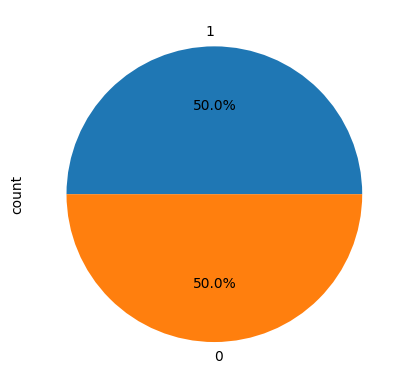

In [600]:
y_res.value_counts().plot.pie(autopct='%1.1f%%')

Agora com os dados balanceados, é possível treinar o modelo com mais eficiência. Além disso, uma outr abordagem para otimizar o desempenho é utilizar o RandomizedSearchCV, que permite encontrar automaticamente a melhor combinação de parâmetros para o modelo.

In [601]:
# import para achar os melhores parametros
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, stratify=y_res, random_state=42
)

# dicionario para a busca de parâmetros com RSCV
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced']
}

# criando o modelo
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42
)

# treinamento com busca
random_search.fit(X_train, y_train)

# separando o melhor modelo
best_model = random_search.best_estimator_
print("Melhores Parâmetros:", random_search.best_params_)

# fazendo as predições
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# fazendo os testes de acurácia do modelo
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("\nAcurácia do set de Teste:", accuracy_test)
print("Acurácia do set de Treino:", accuracy_train)

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_test))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_test))

Melhores Parâmetros: {'class_weight': 'balanced', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 104}

Acurácia do set de Teste: 0.82
Acurácia do set de Treino: 0.9685714285714285

Matriz de Confusão:
[[118  32]
 [ 22 128]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       150
           1       0.80      0.85      0.83       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



Pelos resultados é possível observar um pouco de overffiting, pois a acurácia de treino foi um pouco maior que a de teste. Porém o modelo se saiu melhor que os outros já feitos mais acima tendo previsto 118 pacientes sem diabetes e 128 com diabetes corretamente, sendo possivel ver isso pela matriz de confusao. Analisando o relatorio a precisao para Outcome = 0 foi de 0.84 com recall de 0.79 e para Outcome = 1 foi de 0.80 com recall de 0.85.

In [602]:
# pegando os nomes das variáveis com base no X_train (usado no modelo)
features = X_train.columns

# importâncias das features do RandomForest
importancias = best_model.feature_importances_

# criando o DataFrame
importances = pd.DataFrame({
    'Variável': features,
    'Importância': importancias
})

# ordenando do maior para o menor
importances = importances.sort_values(by='Importância', ascending=False)

importances

,Variável,Importância
1,Glucose,0.376298
4,BMI,0.168209
6,Age,0.116397
5,DiabetesPedigreeFunction,0.104052
0,Pregnancies,0.072160
2,BloodPressure,0.059431
3,SkinThickness,0.058739
7,Insulin_log,0.044715


Acima é possivel observar quais são as variáveis com maior impacto no modelo. Com base nisso será possível relacionar essas variáveis e criar novas em um contexto clínico plausível para melhorar os resultados do modelo.

In [603]:
# criando um dataset com as variaveis balanceadas
df_res = X_res.copy()
df_res['Outcome'] = y_res

df_res['Glucose_BMI_Index'] = df_res['Glucose'] * df_res['BMI'] # nova variável relacionando BMI x Glucose
df_res['Glucose_BMI_Age'] = df_res['Glucose_BMI_Index'] / df_res['Age'] # nova variável relacionando BMI x Glucose / Age
df_res['Insulin_per_Age']  =  df_res['Insulin_log'] * df_res['Age'] # nova variável relacionando Insulin x Age
df_res['Glucose_BMI_Insulin']= df_res['Glucose_BMI_Index'] / df_res['Insulin_log'] # nova variavel relacionando Glucose x BMI/ Insulin

In [604]:
# testando a correlaçao das novas variaveis com o target
print(df_res.Outcome.corr(df_res.Glucose_BMI_Index))
print(df_res.Outcome.corr(df_res.Glucose_BMI_Age))
print(df_res.Outcome.corr(df_res.Insulin_per_Age))
print(df_res.Outcome.corr(df_res.Glucose_BMI_Insulin))

0.5350350870247286
0.2459183666568655
0.29080297552387785
0.4898326759328771


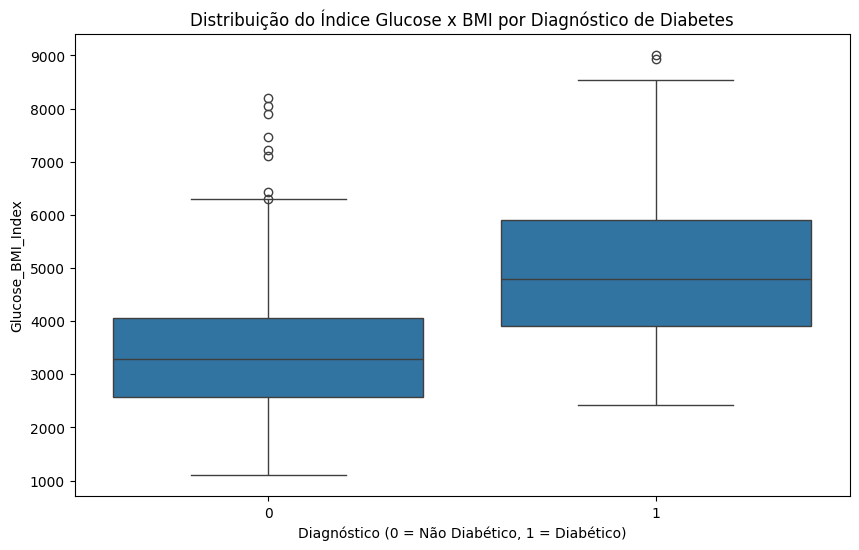

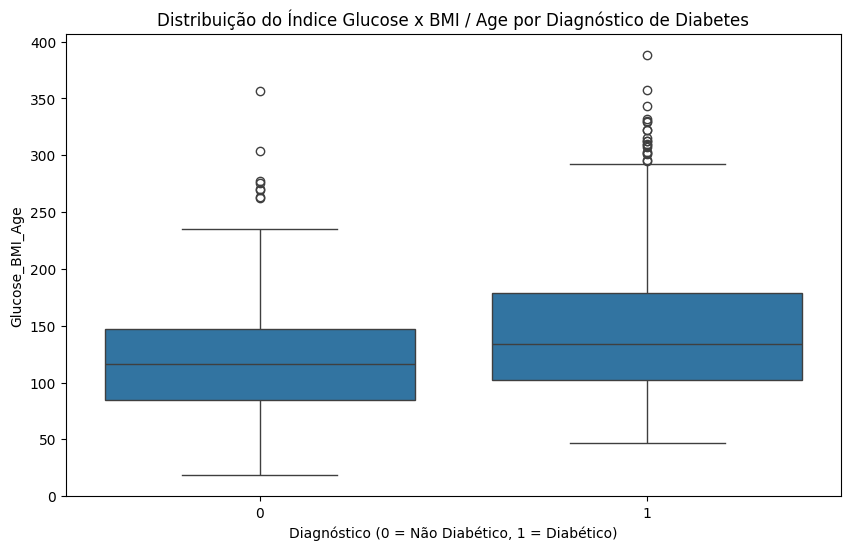

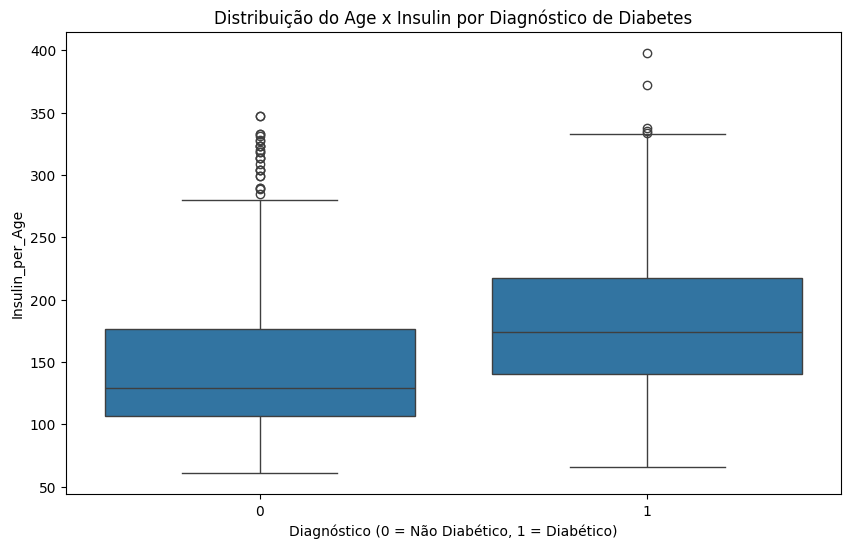

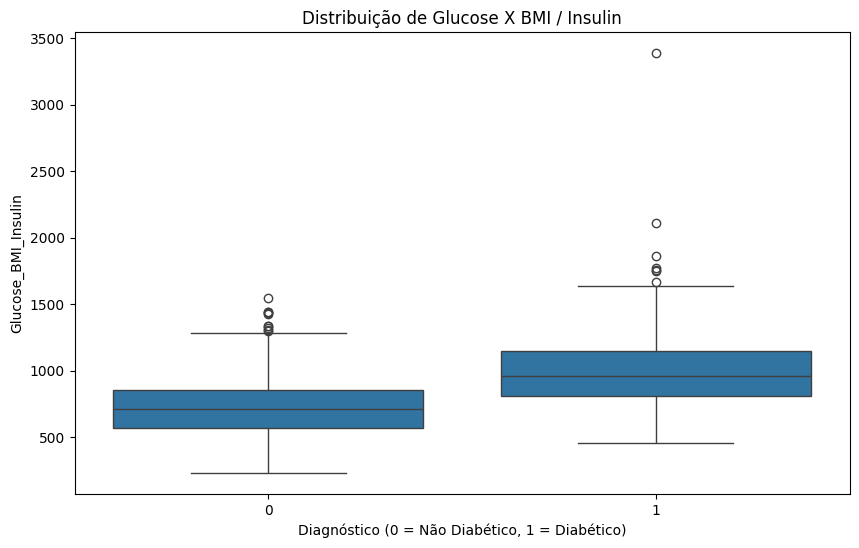

In [605]:
# lista para plotar os graficos
variaveis_box = [
    ('Glucose_BMI_Index', 'Distribuição do Índice Glucose x BMI por Diagnóstico de Diabetes', 'Glucose_BMI_Index'),
    ('Glucose_BMI_Age', 'Distribuição do Índice Glucose x BMI / Age por Diagnóstico de Diabetes', 'Glucose_BMI_Age'),
    ('Insulin_per_Age', 'Distribuição do Age x Insulin por Diagnóstico de Diabetes', 'Insulin_per_Age'),
    ('Glucose_BMI_Insulin', 'Distribuição de Glucose X BMI / Insulin', 'Glucose_BMI_Insulin')
]

# loop para gerar os boxplots
for var, titulo, ylabel in variaveis_box:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Outcome', y=var, data=df_res)
    plt.title(titulo)
    plt.xlabel('Diagnóstico (0 = Não Diabético, 1 = Diabético)')
    plt.ylabel(ylabel)
    plt.show()

Observando os resultados, é possivel ver que a correlação para as novas variáveis foram positivas indicando que quanto maior esse índice maior a probabilidade da paciente ser diabética. Isso pode ser reforçado observando os gráficos, onde nos casos em que Outcome = 1 a mediana é bem mais alta comparada com os casos em que Outcome = 0.

In [606]:
# criando as novas variáveis para treinar o modelo novamente
dataset_final['Glucose_BMI_Index'] = dataset_final['Glucose'] * dataset_final['BMI']
dataset_final['Glucose_BMI_Age'] = dataset_final['Glucose_BMI_Index'] / dataset_final['Age']
dataset_final['Insulin_per_Age']  =  dataset_final['Insulin_log'] * dataset_final['Age']
dataset_final['Glucose_BMI_Insulin']= (dataset_final['Glucose_BMI_Index'] ) / dataset_final['Insulin_log']

X = dataset_final.drop('Outcome', axis=1)
y = dataset_final['Outcome']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, stratify=y_res, random_state=42
)

# dicionario para a busca de parâmetros com RSCV
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced']
}

# criando o modelo
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42
)

# treinamento com busca
random_search.fit(X_train, y_train)

# separando o melhor modelo
best_model = random_search.best_estimator_
print("Melhores Parâmetros:", random_search.best_params_)

# fazendo as predições
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# fazendo os testes de acurácia do modelo
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("\nAcurácia do set de Teste:", accuracy_test)
print("Acurácia do set de Treino:", accuracy_train)

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_test))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_test))

Melhores Parâmetros: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 190}

Acurácia do set de Teste: 0.84
Acurácia do set de Treino: 0.9885714285714285

Matriz de Confusão:
[[118  32]
 [ 16 134]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       150
           1       0.81      0.89      0.85       150

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



Após treinar o modelo com as novas variáveis derivadas, foi possível observar uma melhora em relação ao modelo anterior. A acurácia no conjunto de teste subiu de 0.82 para 0.84, e a diferença entre as acurácias de treino e teste diminuiu, indicando menor overfitting.

Na matriz de confusão, os resultados para o Outcome = 0 permaneceram iguais, mas houve uma melhora para o Outcome = 1, onde o número de falsos negativos caiu de 22 para 16, enquanto os verdadeiros positivos aumentaram de 128 para 134.

No relatório, a precisão para o Outcome = 0 aumentou de 0.84 para 0.88, com o recall se mantendo o mesmo. Para o Outcome = 1, a precisão subiu de 0.80 para 0.81 e o recall de 0.85 para 0.89, mostrando uma melhor capacidade do modelo em identificar corretamente os casos positivos de diabetes.

In [607]:
# pegando os nomes das variáveis com base no X_train (usado no modelo)
features = X_train.columns

# importâncias das features do RandomForest
importancias = best_model.feature_importances_

# criando o DataFrame
importances = pd.DataFrame({
    'Variável': features,
    'Importância': importancias
})

# ordenando do maior para o menor
importances = importances.sort_values(by='Importância', ascending=False)

importances

,Variável,Importância
8,Glucose_BMI_Index,0.168284
1,Glucose,0.130117
11,Glucose_BMI_Insulin,0.122883
10,Insulin_per_Age,0.092063
9,Glucose_BMI_Age,0.078064
4,BMI,0.076889
5,DiabetesPedigreeFunction,0.072867
6,Age,0.065684
2,BloodPressure,0.051357
0,Pregnancies,0.050500


Aqui acima é possível notar que as novas variáveis criadas contribuiram positivamente para o treinamento do modelo